In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../input/celeba-dataset/list_attr_celeba.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

To read and check all the data in provided dataset

In [3]:
import pandas as pd
import numpy as np 

In [4]:
d1= pd.read_csv('/kaggle/input/celeba-dataset/list_landmarks_align_celeba.csv')
d2= pd.read_csv('/kaggle/input/celeba-dataset/list_eval_partition.csv')
d3= pd.read_csv('/kaggle/input/celeba-dataset/list_attr_celeba.csv')
d4= pd.read_csv('/kaggle/input/celeba-dataset/list_bbox_celeba.csv')



In [5]:

path_dir= r'../input/celeba-dataset/img_align_celeba/img_align_celeba'


In [6]:
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random

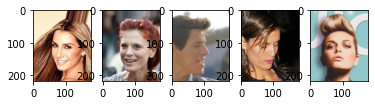

In [7]:
for i in range(5):
    img=mpimg.imread('../input/celeba-dataset/img_align_celeba/img_align_celeba/00000'+ str(i+1)+'.jpg')
    ax=plt.subplot(1,5,i+1)
    plt.imshow(img)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/kaggle/input/celeba-dataset/list_attr_celeba.csv')
path_dir= r'../input/celeba-dataset/img_align_celeba/img_align_celeba'

In [9]:
from PIL import Image

im = Image.open('../input/celeba-dataset/img_align_celeba/img_align_celeba/000001.jpg')
width, height = im.size

In [10]:
print(width, height)

178 218


In [11]:
from PIL import Image

im = Image.open('../input/celeba-dataset/img_align_celeba/img_align_celeba/000030.jpg')
width1, height = im.size

In [12]:
print(width, height)

178 218


In [13]:
d1.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [14]:
d1.shape

(202599, 11)

In [15]:
d2.head()

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [16]:
d2.shape

(202599, 2)

In [17]:
d3.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [18]:
d3.shape

(202599, 41)

In [19]:
d4.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [20]:
d4.shape

(202599, 5)

In [21]:
d3.corr()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
5_o_Clock_Shadow,1.000000,-0.158587,-0.062415,0.168488,0.005584,-0.089243,-0.043699,0.152010,1.006038e-01,-0.132686,...,0.259370,-0.067777,0.052260,-0.124250,-0.161911,0.033997,-0.333921,-0.116239,0.097899,0.014869
Arched_Eyebrows,-0.158587,1.000000,0.250599,-0.091947,-0.069524,-0.027775,0.243400,-0.084025,-9.959764e-04,0.127009,...,-0.116001,0.093834,-0.054486,0.200835,0.294779,-0.099980,0.460409,0.220184,-0.132821,0.146798
Attractive,-0.062415,0.250599,1.000000,-0.178464,-0.145826,0.059712,0.062552,-0.277064,4.139890e-03,0.154774,...,-0.100229,0.147845,0.041550,0.214992,0.124349,-0.138636,0.480104,0.068738,-0.156420,0.387735
Bags_Under_Eyes,0.168488,-0.091947,-0.178464,1.000000,0.116215,-0.057568,-0.005982,0.361604,2.667485e-03,-0.106879,...,0.100411,0.112759,0.024208,-0.127128,-0.096969,-0.005726,-0.284052,-0.052964,0.196980,-0.230759
Bald,0.005584,-0.069524,-0.145826,0.116215,1.000000,-0.064044,-0.003577,0.180148,-8.036419e-02,-0.063056,...,0.058599,0.009402,-0.071920,-0.103482,-0.061211,-0.030625,-0.142852,-0.050445,0.176501,-0.196253
Bangs,-0.089243,-0.027775,0.059712,-0.057568,-0.064044,1.000000,0.034876,-0.069395,-3.355778e-02,0.098854,...,-0.073341,0.052469,0.020034,0.068166,0.058203,-0.079939,0.163378,0.114454,-0.092919,0.017695
Big_Lips,-0.043699,0.243400,0.062552,-0.005982,-0.003577,0.034876,1.000000,0.076814,6.719131e-02,0.023674,...,-0.039739,0.012885,-0.037144,0.120190,0.126523,-0.013286,0.195212,0.149892,-0.067770,0.107722
Big_Nose,0.152010,-0.084025,-0.277064,0.361604,0.180148,-0.069395,0.076814,1.000000,8.109064e-02,-0.158323,...,0.131667,0.100888,-0.028837,-0.131843,-0.058029,0.065552,-0.303651,-0.035930,0.205014,-0.284382
Black_Hair,0.100604,-0.000996,0.004140,0.002667,-0.080364,-0.033558,0.067191,0.081091,1.000000e+00,-0.233626,...,0.043231,-0.002533,0.112496,-0.085227,0.002348,-0.103605,-0.066856,-0.042539,0.023184,0.121372
Blond_Hair,-0.132686,0.127009,0.154774,-0.106879,-0.063056,0.098854,0.023674,-0.158323,-2.336262e-01,1.000000,...,-0.096039,0.090209,0.005458,0.128400,0.095005,-0.083373,0.281935,0.143577,-0.106377,0.052402


<AxesSubplot:xlabel='Arched_Eyebrows'>

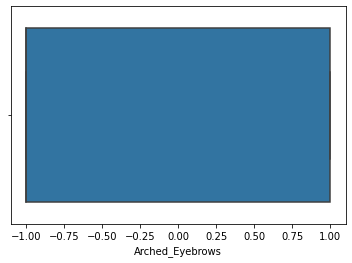

In [22]:
import seaborn as sns
sns.boxplot(x=d3['Arched_Eyebrows'])

In [23]:
d3["Arched_Eyebrows"].replace({-1: 0, 1: 1}, inplace=True)

d3["Arched_Eyebrows"].head()

0    1
1    0
2    0
3    0
4    1
Name: Arched_Eyebrows, dtype: int64

In [24]:
d3["Arched_Eyebrows"].value_counts()

0    148509
1     54090
Name: Arched_Eyebrows, dtype: int64

In [31]:
d=pd.DataFrame(dataset.iloc[:150000])

In [43]:
#cols = list(dataset.columns[1:])
#cols= d['Arched_Eyebrows']

train_df, val_df = train_test_split(d, test_size=.2)



train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
     horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1/255)
train_data = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory=path_dir,
            x_col="image_id",
            y_col="Arched_Eyebrows",
            target_size=(170, 170),
            batch_size=32,
            class_mode='raw')

val_data = val_datagen.flow_from_dataframe(
            dataframe=val_df,
            directory=path_dir,
            x_col="image_id",
            y_col="Arched_Eyebrows",
            target_size=(170, 170),
            batch_size=32,
            class_mode='raw')


Found 120000 validated image filenames.
Found 30000 validated image filenames.


In [44]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
label_binarizer = LabelBinarizer()


In [45]:
d['Arched_Eyebrows'] = label_binarizer.fit_transform(d['Arched_Eyebrows'])
d['Arched_Eyebrows'] = to_categorical(d['Arched_Eyebrows'])


In [46]:
from tensorflow.keras import layers

In [47]:
from keras.applications.nasnet import NASNetLarge
from keras.models import Model


In [49]:
from tensorflow import keras
model = keras.Sequential(
    [keras.Input(shape=(170, 170, 3)),
     resnet,
     #keras.layers.MaxPooling2D(pool_size=(2,2)),
     keras.layers.Dense(1020, activation="relu"),
     keras.layers.Dense(512, activation="relu"),
     keras.layers.Dropout(0.3),
     keras.layers.Flatten(),
     keras.layers.Dense(units=1,activation="sigmoid")
     ]
)

In [ ]:
model.summary()

In [51]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['accuracy'])

In [52]:
history = model.fit(
      train_data,
      steps_per_epoch=30,  
      epochs=40,
      verbose=1,
      validation_data = val_data,
      validation_steps=30)

Epoch 1/40
30/30 [==============================] - 44s 977ms/step - loss: 0.6763 - accuracy: 0.6722 - val_loss: 0.6331 - val_accuracy: 0.7042
Epoch 2/40
30/30 [==============================] - 23s 775ms/step - loss: 0.6236 - accuracy: 0.7015 - val_loss: 0.5715 - val_accuracy: 0.7385
Epoch 3/40
30/30 [==============================] - 23s 774ms/step - loss: 0.5705 - accuracy: 0.7375 - val_loss: 0.5592 - val_accuracy: 0.7229
Epoch 4/40
30/30 [==============================] - 23s 771ms/step - loss: 0.5458 - accuracy: 0.7369 - val_loss: 0.5364 - val_accuracy: 0.7406
Epoch 5/40
30/30 [==============================] - 22s 753ms/step - loss: 0.5477 - accuracy: 0.7177 - val_loss: 0.5388 - val_accuracy: 0.7271
Epoch 6/40
30/30 [==============================] - 22s 726ms/step - loss: 0.5114 - accuracy: 0.7405 - val_loss: 0.4681 - val_accuracy: 0.7708
Epoch 7/40
30/30 [==============================] - 23s 759ms/step - loss: 0.5353 - accuracy: 0.7197 - val_loss: 0.5203 - val_accuracy: 0.7292